In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [4]:
def create_sinc_kernel(k):
    taps = []
    start = 0.5 - (k / 2.0)
    for i in range(k):
        cur = start + i
        taps.append(math.sin(2 * math.pi * cur / k) / (2 * math.pi * cur * k))
        
    taps = np.array(taps)
    gain = taps.sum()

    taps = taps / gain
    
    return taps

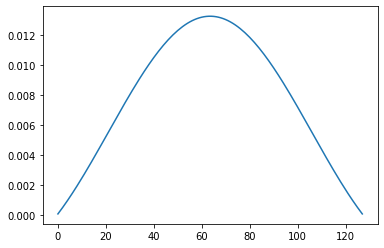

In [15]:
x = np.arange(0, 128)
y = np.array(create_sinc_kernel(128))

plt.plot(x, y)
plt.show()

In [18]:
def fir_filter(samples, kernel):
    if len(kernel) > len(samples):
        gain = kernel[0:len(samples)].sum()
        kernel = kernel / gain

    acc = 0.0
    for i in range(len(samples)):
        sample = samples[i]
        acc += sample * kernel[i]
        
    return acc

In [88]:
def apply_filter(samples, blockSize, kernel):
    means = []
    for i in range(1, len(samples)+1):
        start = 0 if i < blockSize else i - blockSize
        sliced = samples[start:i]
        means.append(fir_filter(sliced, kernel))
        
    return means

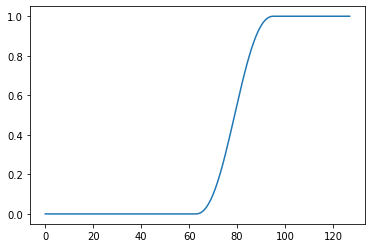

In [25]:
blockSize = 32
kernel = create_sinc_kernel(blockSize)
x = np.arange(0, 128)
y = np.concatenate((np.zeros(64), np.ones(64)))
y = apply_filter(y_step_r, blockSize, kernel)

plt.plot(x, y)
plt.show()

In [94]:
def mean(samples):
    return np.array(samples).mean()

def moving_average(samples, blockSize):
    means = []
    for i in range(1, len(samples)+1):
        start = 0 if i < blockSize else i - blockSize
        sliced = samples[start:i]
        means.append(mean(sliced))
        
    return np.array(means)

In [101]:
moving_average(imp, 32)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
       0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333,
       0.03225806, 0.03125   ])

In [107]:
x = np.arange(0+1/32, 1+1/32, 1/32)
x

array([0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 , 0.21875,
       0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625, 0.4375 ,
       0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     ])

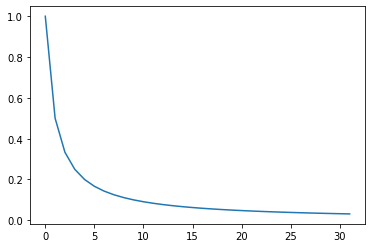

In [96]:
imp = np.zeros(32)
imp[0] = 1

x = np.arange(0, 32)
y = moving_average(imp, 32)

plt.plot(x, y)
plt.show()

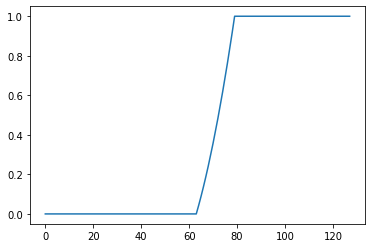

In [109]:
blockSize = 16

imp = np.zeros(blockSize)
imp[0] = 1

kernel =  np.array(moving_average(imp, blockSize))
kernel = np.flip(np.arange(0+1/32, 1+1/32, 1/32))
x = np.arange(0, 128)
y = np.concatenate((np.zeros(64), np.ones(64)))
y = apply_filter(y, blockSize, kernel)
#y = moving_average(y, blockSize)

plt.plot(x, y)
plt.show()

In [62]:
np.flip(np.array([1, 2]))

array([2, 1])